In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [2]:
#Read in the data
df = pd.read_csv("movie.csv")

df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
#check for data shape
df.shape

(7668, 15)

In [4]:
#checking for missing vale

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
df.dropna(subset=["gross"], axis= 0,  inplace = True)
df.shape

(7479, 15)

In [25]:
# check data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [26]:
df.sort_values(by="gross", inplace=False, ascending= False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [8]:
pd.set_option("display.max_rows", None)

In [23]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# Extracting possible correlated variables

df1 = df[["rating", "genre", "score", "votes","director", "budget", "company", "gross"]]

In [11]:
df1.head()

,rating,genre,score,votes,director,budget,company,gross
0,R,Drama,8.4,927000.0,Stanley Kubrick,19000000.0,Warner Bros.,46998772.0
1,R,Adventure,5.8,65000.0,Randal Kleiser,4500000.0,Columbia Pictures,58853106.0
2,PG,Action,8.7,1200000.0,Irvin Kershner,18000000.0,Lucasfilm,538375067.0
3,PG,Comedy,7.7,221000.0,Jim Abrahams,3500000.0,Paramount Pictures,83453539.0
4,R,Comedy,7.3,108000.0,Harold Ramis,6000000.0,Orion Pictures,39846344.0


C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


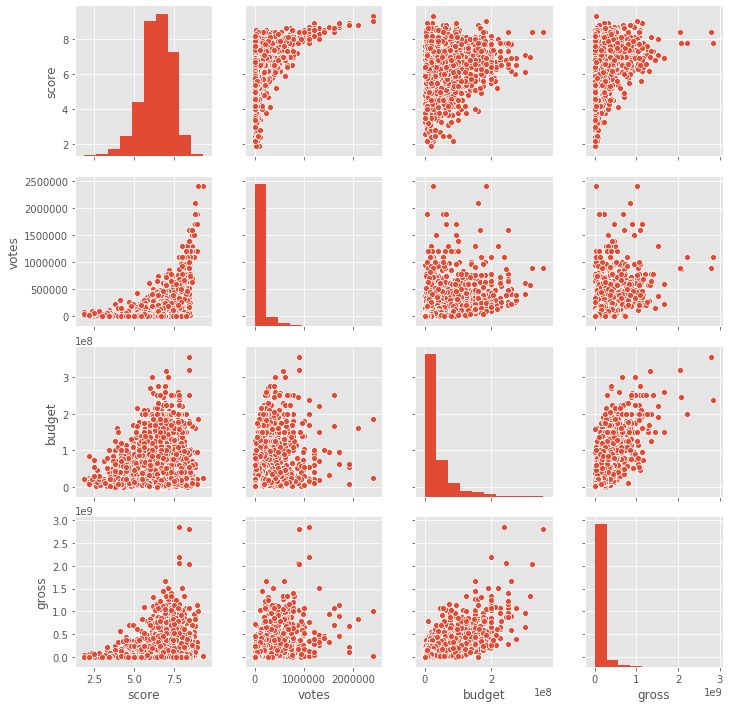

In [12]:
sns.pairplot(df1)

From the scatterplot matrix, I observed a few linear relationships:
1) votes and budget
2) Votes and gross
3) Budget and gross

I also observed that there was no correlation between score variable and other variables, hence the score variable will be dropped from our model variables.

In [13]:
#confirming correlation using pearson method

df1.corr(method="pearson")

,score,votes,budget,gross
score,1.000000,0.413096,0.071792,0.186258
votes,0.413096,1.000000,0.440021,0.630757
budget,0.071792,0.440021,1.000000,0.740395
gross,0.186258,0.630757,0.740395,1.000000


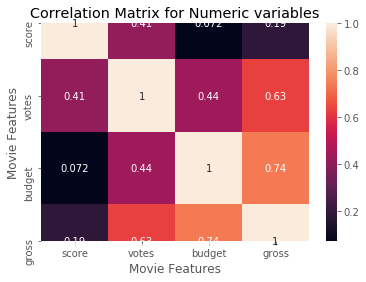

In [14]:
correlation_matrix = df1.corr(method="pearson")

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric variables")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [15]:
#Dropping the score variable 

df2 = df1.drop(["score"], axis= 1)
df2.head()

,rating,genre,votes,director,budget,company,gross
0,R,Drama,927000.0,Stanley Kubrick,19000000.0,Warner Bros.,46998772.0
1,R,Adventure,65000.0,Randal Kleiser,4500000.0,Columbia Pictures,58853106.0
2,PG,Action,1200000.0,Irvin Kershner,18000000.0,Lucasfilm,538375067.0
3,PG,Comedy,221000.0,Jim Abrahams,3500000.0,Paramount Pictures,83453539.0
4,R,Comedy,108000.0,Harold Ramis,6000000.0,Orion Pictures,39846344.0


In [16]:
#converting all object data into category

df_numerized = df2

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes


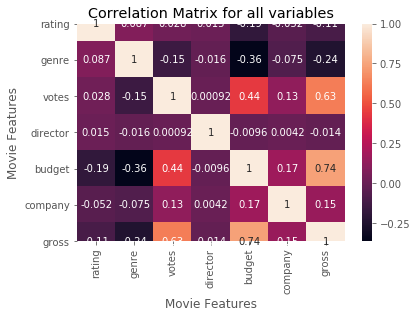

In [17]:
#Confirming correlation using heatmap

correlation_matrix = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for all variables")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [18]:
#Creating holdout samples

#creating Subsets
x_variables = df2.drop(["gross"], axis= 1)
y_variable = df2["gross"]

#importing train_test_split function from sci-kit learn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_variables, y_variable, test_size= 0.3, random_state= 42)

# Model Construction

In [19]:
# Writing the OLS formula

ols_formula = "gross~ budget + votes + (director) + (genre) + (company) + (rating)"

In [20]:
from statsmodels.formula.api import ols

In [21]:
#Create OLS dataframe

ols_data = pd.concat([x_train,y_train], axis=1 )

#create ols object and  fit  the data

OLS= ols(formula= ols_formula, data= ols_data)
model= OLS.fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:23:57   Log-Likelihood:                -76190.
No. Observations:                3821   AIC:                         1.524e+05
Df Residuals:                    3814   BIC:                         1.524e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.469e+07   1.14e+07      2.170      0.030    2.38e+06     4.7e+07
budget         2.7048      0.052     52.218      0.000       2.603       2.806
votes        355.3134     10.938     32.485      0.000     333.869     376.758
director   -5626.7918   2184.231     -2.576      0.010   -9909.166   -1344.418
genre       2.266e+06   7.18e+05      3.156      0.002    8.58e+05    3.67e+06
company      169.2619   2728.983      0.062      0.951   -5181.144    5519.668
rating     -1.139e+07   1.76e+06     -6.465      0.000   -1.48e+07   -7.93e+06
==============================================================================
Omnibus:                     3356.453   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           343249.185
Skew:                           3.699   Prob(JB):                         0.00
Kurtosis:                      48.839   Cond. No.                     3.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be concluded that budget and votes are the only variables correlated to the gross earning of each movie, such that: 
    - If we compare two movies having same characteristics except that if one has a buget of 1 million higher, we will expect the movie with the higher budget to make about 2.7 millions gross higher. 
    -And If we compare two movies having same characteristics except that one has a vote of 1 higher, we will expect the movie with the higher votes to make about 355.31 millions gross higher.
    
